<a href="https://colab.research.google.com/github/Alex-Witt/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
#!pip install --upgrade seaborn

In [225]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [233]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [234]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [235]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [236]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [237]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [238]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [239]:
df = pd.merge(income, lifespan) 
df = pd.merge(df, population)
df.shape

(40437, 5)

In [240]:
df = pd.merge(df, entities[['country', 'name', 'world_6region']],
              how='inner', left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
df = (df.drop(columns = ['geo', 'country'])
      .rename(columns = {'time':'year','income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                         'life_expectancy_years':'lifespan', 'population_total': 'population',
                         'name': 'country', 'world_6region':'region'}))

In [242]:
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [243]:
df.tail()

,year,income,lifespan,population,country,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


## Explore data

In [244]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [245]:
df.skew()

year          -0.005098
income         6.300582
lifespan       0.825236
population    13.031487
dtype: float64

In [246]:
df.describe(exclude = np.number)

,country,region
count,40437,40437
unique,187,6
top,Cote d'Ivoire,europe_central_asia
freq,219,10778


In [247]:
df.country.nunique()

187

In [248]:
usa = df[df.country == 'United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [249]:
china = df[df.country == 'China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [0]:
now = df[df.year == 2018]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[j])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc770e198>,
      dtype=object)

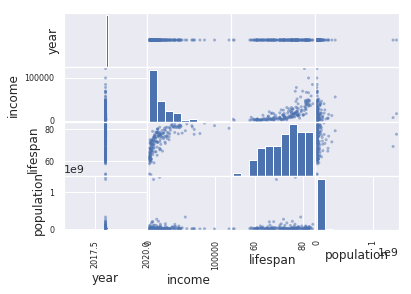

In [251]:
pd.scatter_matrix(now)

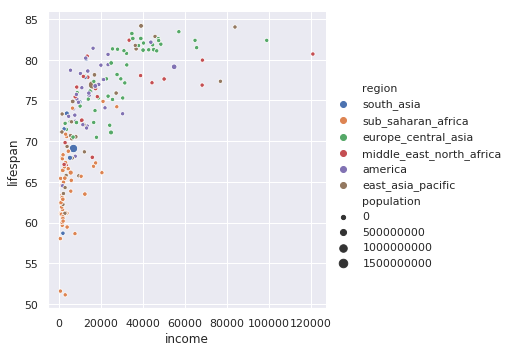

In [252]:
sns.relplot(x = 'income', y = 'lifespan', hue = 'region', size = 'population', data = now)

## Analyze outliers

In [253]:
now[now.income > 80000].sort_values(by = 'income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa


In [0]:
qatar = now[now.country == 'Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = quatar.lifespan.values[0]

Text(0.5, 1.0, 'Qatar has the highest income in 2018')

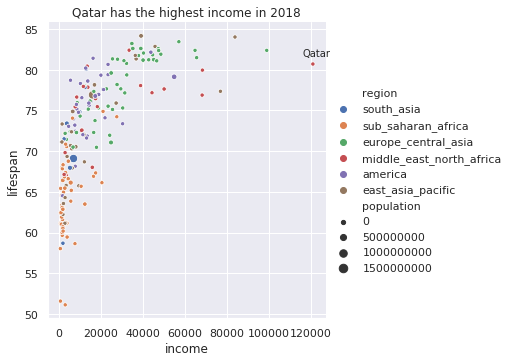

In [255]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now)

plt.text(x=qatar_income - 5000, y=qatar_lifespan + 1, s='Qatar')
plt.title('Qatar has the highest income in 2018')

## Plot multiple years

,year,income,lifespan,population,country,region
18,1818,604,28.03,3308390,Afghanistan,south_asia
68,1868,711,27.51,4126245,Afghanistan,south_asia
118,1918,849,7.89,5704092,Afghanistan,south_asia
168,1968,1196,44.37,10604346,Afghanistan,south_asia
218,2018,1867,58.69,36373176,Afghanistan,south_asia
237,1818,668,26.98,1586896,Angola,sub_saharan_africa
287,1868,832,26.98,2277231,Angola,sub_saharan_africa
337,1918,1174,12.01,3487015,Angola,sub_saharan_africa
387,1968,5231,47.44,6523791,Angola,sub_saharan_africa
437,2018,5846,65.19,30774205,Angola,sub_saharan_africa


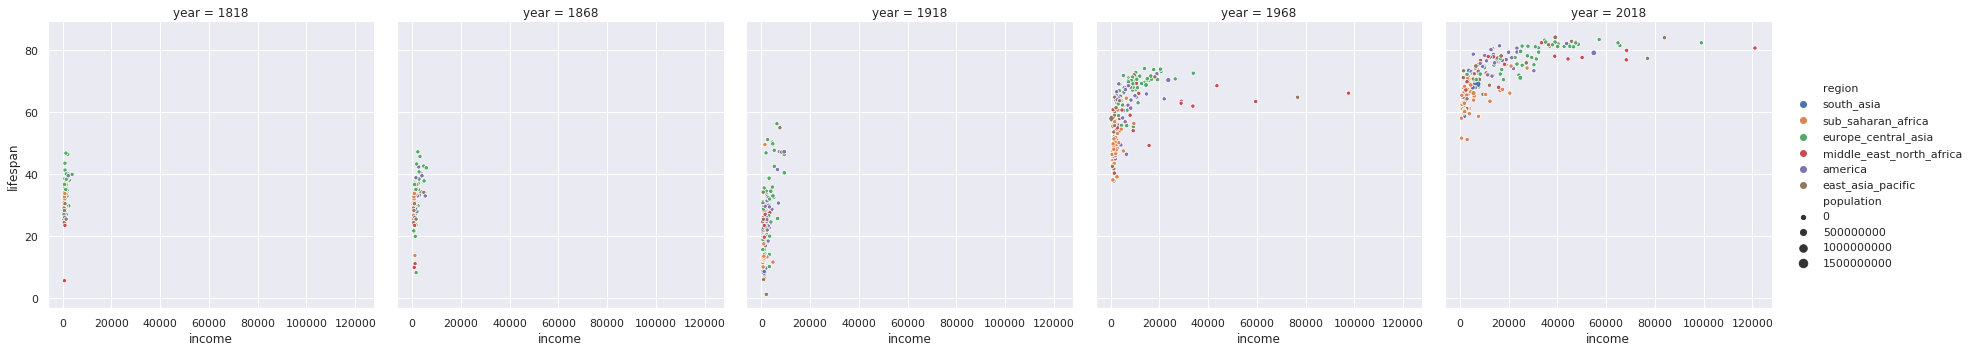

In [256]:
years = [1818, 1868, 1918, 1968, 2018]

centuries = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)

#plt.xscale('log');

## Point out a story

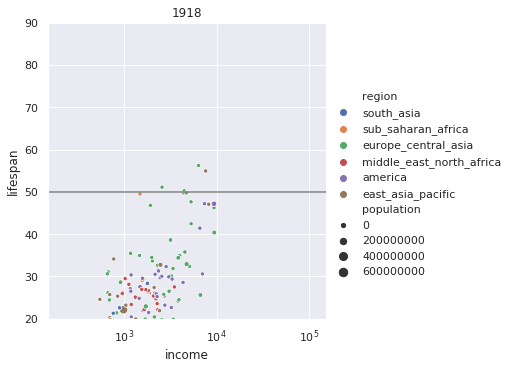

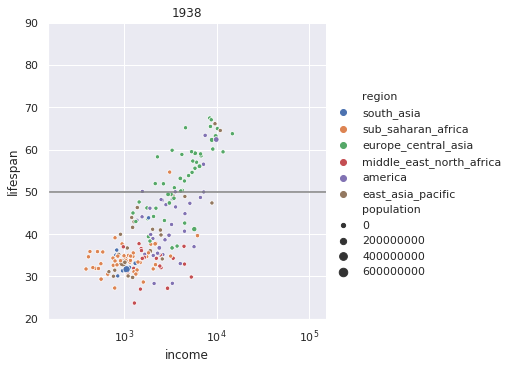

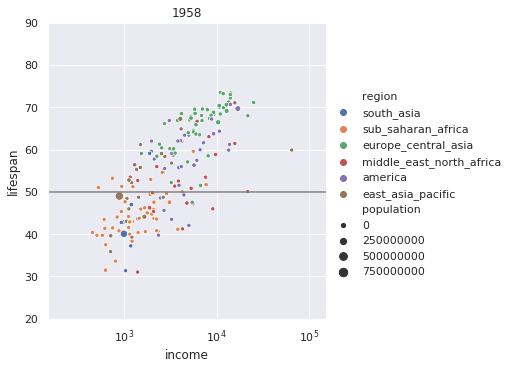

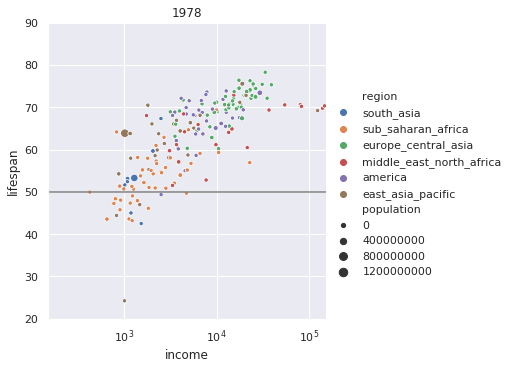

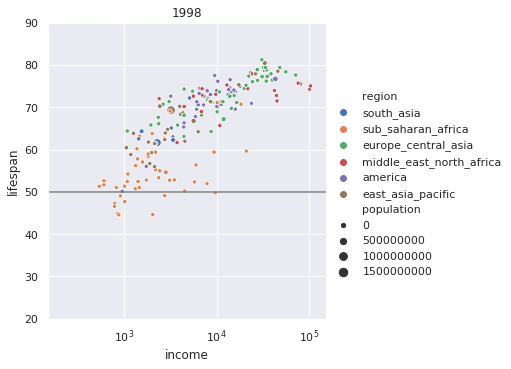

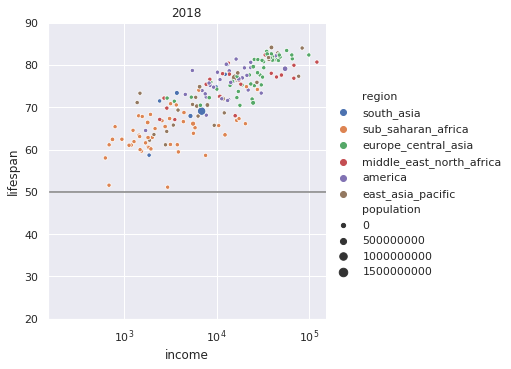

In [257]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey')

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [86]:
df = pd.read_csv('https://www.dropbox.com/s/fv0txjlq0xhivnl/DC%20Parking%20Violations%202011%20-%202018%20Tidy.csv?dl=1')

print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(14386868, 11)


,X,Y,Violation Code,Violation Description,Address,License Plate State,Body Style,Ticket Issue Date,Year,Month,Day of the Week
0,-76.990883,38.901329,P012,Illegal Parking Location,1200 BLOCK I ST NE NORTH SIDE,Other,4D,2011-09-01 00:00:00,2011,9,Thursday
1,-77.028853,38.917009,P039,Meter Violation,1300 BLOCK U ST NW NORTH SIDE,MD,4D,2011-09-01 00:00:00,2011,9,Thursday
2,-77.013880,38.888564,P036,Residential Zone Violation,200 MARYLAND AV SW,DC,TK,2011-09-01 00:00:00,2011,9,Thursday
3,-77.054309,38.926666,P172,ROSA Violation,2600 BLOCK GARFIELD ST NW NORTH SID,Other,4D,2011-09-01 00:00:00,2011,9,Thursday
4,-77.023957,38.897877,P199,Obstructing Traffic,700 9TH ST NW BLOCK EAST SIDE,DC,NaN,2011-09-01 00:00:00,2011,9,Thursday


In [0]:
violations_by_month = pd.crosstab(index = df['Month'],
                                  columns = df['Violation Description'])

In [0]:
violations_by_month = violations_by_month.reset_index()

In [175]:
violations_by_month.columns.values

array(['Month', 'DMV Related Violation', 'Illegal Parking Location',
       'Meter Violation', 'Obstructing Traffic', 'ROSA Violation',
       'Residential Zone Violation', 'Temporary Parking Restriction'],
      dtype=object)

In [101]:
df['License Plate State'].value_counts()

MD       5147480
DC       4091855
VA       3256980
Other    1890553
Name: License Plate State, dtype: int64

In [0]:
months = (1,2,3,4,5,6,7,8,9,10,11,12)

In [0]:
cross = pd.crosstab(index = df['Month'], columns = df['Year']).reset_index()

In [224]:
cross.loc[cross.Month.isin(months)]

Year,Month,2011,2012,2013,2014,2015,2016,2017,2018
0,1,133694,296364,136092,205328,117814,89611,174422,100828
1,2,141482,306984,127723,104848,107334,114003,95088,106224
2,3,178476,349274,148792,0,143308,150323,116063,124181
3,4,174230,311242,157401,138111,154503,259677,114651,119847
4,5,0,313378,155922,142393,149630,134910,125481,124522
5,6,175518,299194,143774,145456,148122,258282,125504,124127
6,7,167476,146707,140409,153918,155832,255482,105317,116215
7,8,178117,164352,146878,151652,156399,262048,119865,131809
8,9,168712,130638,130141,153263,148273,241352,106661,102972
9,10,156173,0,138778,147708,147101,251024,119401,126661


No handles with labels found to put in legend.


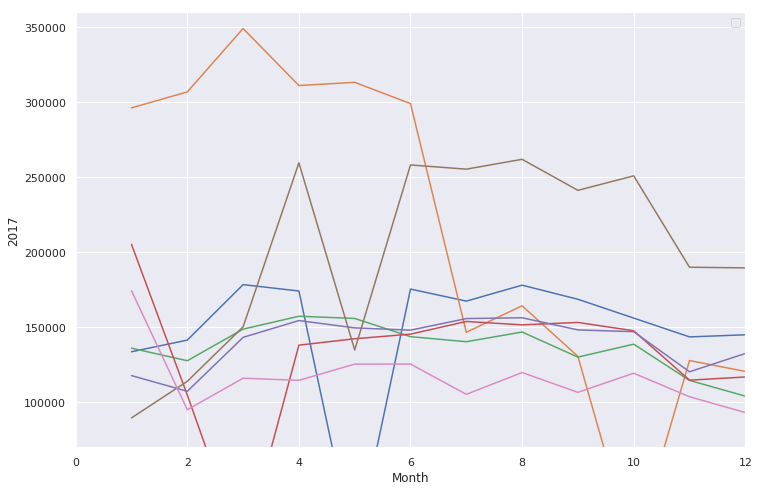

In [286]:
sns.set(rc={'figure.figsize':(12,8)})

plt.ylim(70000,360000)
plt.xlim(0,12)

for i in range (2011,2018): 
  sns.lineplot(cross['Month'], cross[i] )

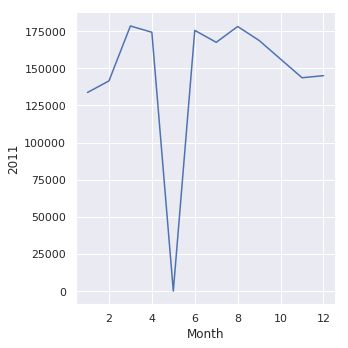

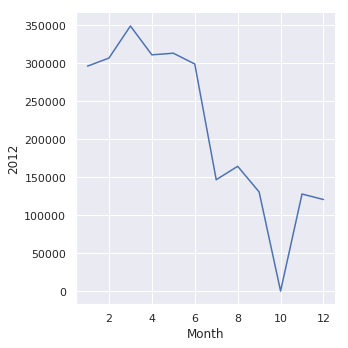

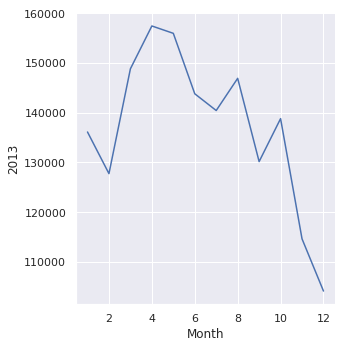

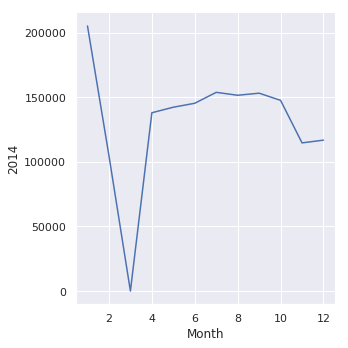

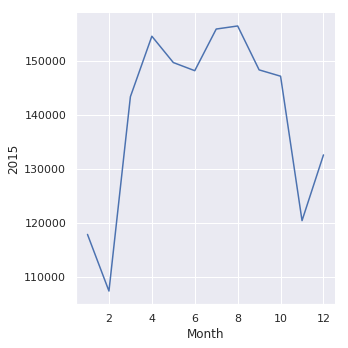

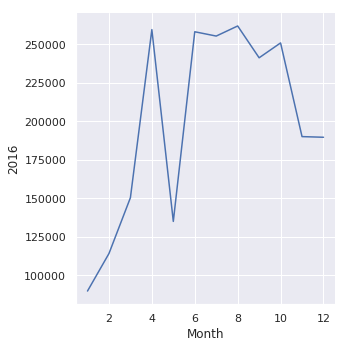

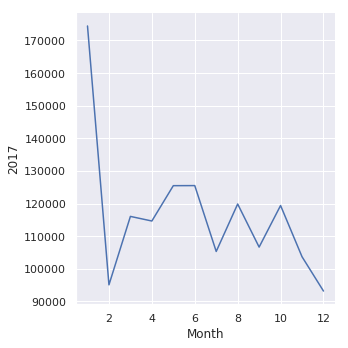

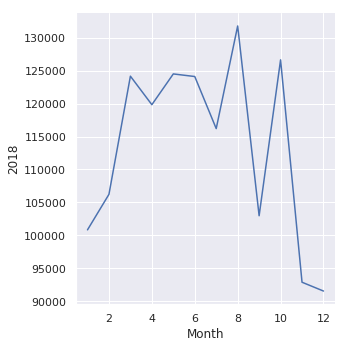

In [289]:
sns.set(rc={'figure.figsize':(12,8)})



sns.relplot(x = 'Month' , y = 2011,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2012,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2013,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2014,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2015,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2016,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2017,data = cross, kind = 'line')
sns.relplot(x = 'Month' , y = 2018,data = cross, kind = 'line')

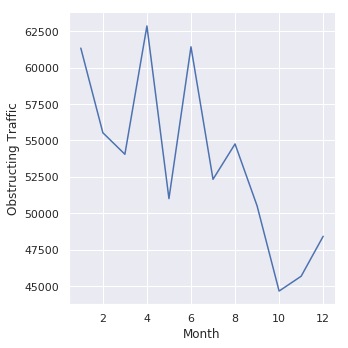

In [187]:
sns.relplot(x = 'Month', y = 'Obstructing Traffic', data = violations_by_month, kind = 'line')

In [0]:
#pd.crosstab(index = df['License Plate State'], columns = df['Violation Description'], normalize = False).plot.bar();

In [0]:
#pd.crosstab(index = df['License Plate State'], columns = df['Violation Description'], normalize = True).plot.bar();

In [0]:
"""common_offenses = df['Violation Description'].value_counts().head(30)
common_offenses = pd.DataFrame(data = {'Violation': common_offenses.index, 'Offense Count': common_offenses.values})"""

In [0]:
"""sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=15)
plt.title(label = "Number of Parking Tickets Issued by Offense in Washington DC (2011-2018)", fontsize = 20)
sns.barplot(x = 'Violation', y = 'Offense Count', data = common_offenses);"""